# Chapter 9 - The SARIMAX Model


Download the code from this Kaggle competition: [Walmart Recruiting - Store Sales Forecasting](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/)


## Listing 9-1. Preparing the data and making a plot


<Axes: xlabel='Date', ylabel='Weekly Sales'>

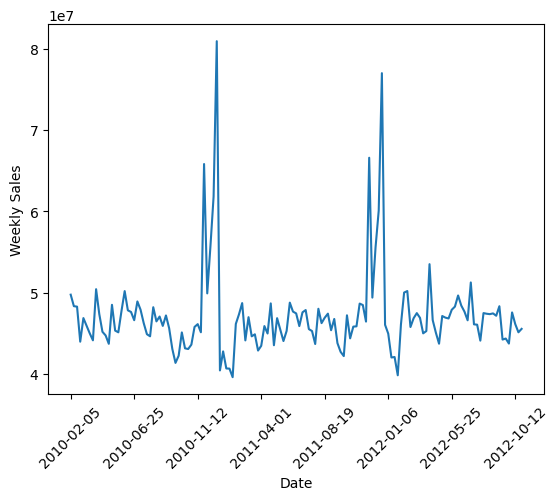

In [2]:
import pandas as pd

data = pd.read_csv("train.csv")
data = data.groupby("Date").sum()
data["IsHoliday"] = data["IsHoliday"] > 0
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: float(x))

data["Weekly_Sales"].plot(ylabel="Weekly Sales", rot=45)

## Listing 9-2 Is there a correlation between sales and holidays?


In [ ]:
data[["Weekly_Sales", "IsHoliday"]].corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


## Listing 9-3 Fitting a SARIMAX model


2026/02/21 10:16:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2026/02/21 10:16:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
2026/02/21 10:16:10 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/21 10:16:10 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/21 10:16:10 INFO 

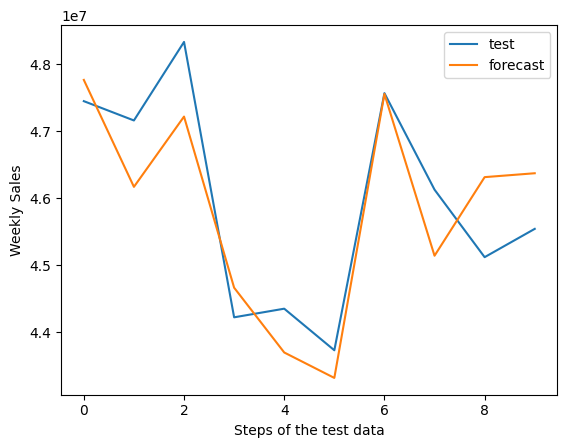

R² Score: 0.7343


In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import mlflow

mlflow.autolog()

train = data["Weekly_Sales"][:-10]
test = data["Weekly_Sales"][-10:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data["Weekly_Sales"][:-10],
    exog=data["IsHoliday"][:-10],
    order=(0, 1, 1),
    seasonal_order=(1, 1, 1, 52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10, exog=data["IsHoliday"][-10:])

plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel("Steps of the test data")
plt.ylabel("Weekly Sales")
plt.legend(["test", "forecast"])
plt.show()

print(f"R² Score: {r2_score(test, fcst):.4f}")